# 1 Dataset

In [1]:
import pandas as pd
#from Twitterpreprocessor import TwitterPreprocessor
import matplotlib.pyplot as plt
import re
import nltk

In [3]:
data = pd.read_excel('./data/LabeledText.xlsx')
data

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive
...,...,...,...
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,positive
4866,997.txt,#blue #eyes can't be #beaten,neutral
4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral


In [4]:
data.isnull().sum()

File Name    0
Caption      0
LABEL        0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  4869 non-null   object
 1   Caption    4869 non-null   object
 2   LABEL      4869 non-null   object
dtypes: object(3)
memory usage: 114.2+ KB


In [6]:
drop_neutral = data[ data['LABEL'] == 'neutral' ].index
data.drop(drop_neutral, inplace = True)

In [7]:
data.loc[data["LABEL"] == "negative", "LABEL"] = 0
data.loc[data["LABEL"] == "positive", "LABEL"] = 1

In [8]:
data['LABEL'].value_counts()

1    1646
0    1452
Name: LABEL, dtype: int64

In [9]:
data = data.astype({"LABEL": int})

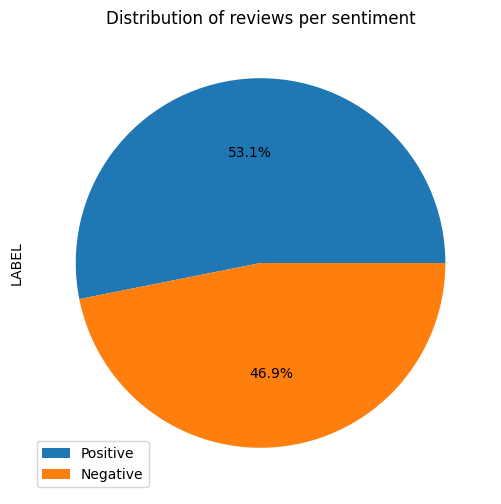

In [10]:
data['LABEL'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

# 2 Data Pre-Processing

## 2.1 Cleaning Data + Stopwords Remove

In [11]:
from Twitterpreprocessor import TwitterPreprocessor
data['cleaning_data'] = data['Caption'].apply(lambda x :TwitterPreprocessor(str(x)).fully_preprocess().text)
#data['cleaning_data'] = data['Caption'].apply(lambda x: remove(x.lower()))
data

,File Name,Caption,LABEL,cleaning_data
0,1.txt,How I feel today #legday #jelly #aching #gym,0,feel today legday jelly aching
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,0,absolute disgrace carriages bangor half standi...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1,this valentines nephews elated sometimes littl...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1,zoes first love rattled
5,1002.txt,Chaotic Love - giclee print ?65 at #art #love ...,1,chaotic love giclee print love chaotic abstrac...
...,...,...,...,...
4862,993.txt,#Fanghorn forest or #Alder #woodland up Glen #...,0,fanghorn forest alder woodland glen vorlich lo...
4863,994.txt,"Where there¡¯s a whisk, there¡¯s a way. #power...",0,where there whisk powerless bakersgonnabake
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,1,well done eskom dies loadshedding powerless
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,1,feelin love valentinesday caring


In [12]:
data.drop_duplicates(subset ="cleaning_data", keep = 'first', inplace = True)

## 2.3 Stemming

In [13]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def porterstemmer(text):
  text = ' '.join(ps.stem(word) for word in text.split() if word in text)
  return text  
data['tweet_stem'] = data['cleaning_data'].apply(porterstemmer)

## 2.4 Lemmazation 
(forme de base d'un mot)

In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [15]:
def lemmatization (text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)
data['tweet_clean'] = data['tweet_stem'].apply(lemmatization)

## 2.5 Data Final

In [16]:
data

,File Name,Caption,LABEL,cleaning_data,tweet_stem,tweet_clean
0,1.txt,How I feel today #legday #jelly #aching #gym,0,feel today legday jelly aching,feel today legday jelli ach,feel today legday jelli ach
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,0,absolute disgrace carriages bangor half standi...,absolut disgrac carriag bangor half stand room...,absolut disgrac carriag bangor half stand room...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1,this valentines nephews elated sometimes littl...,thi valentin nephew elat sometim littl thing b...,thi valentin nephew elat sometim littl thing b...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1,zoes first love rattled,zoe first love rattl,zoe love rattl
5,1002.txt,Chaotic Love - giclee print ?65 at #art #love ...,1,chaotic love giclee print love chaotic abstrac...,chaotic love gicle print love chaotic abstract...,chaotic love gicle print love chaotic abstract...
...,...,...,...,...,...,...
4856,988.txt,RT @bishopcarrollhs: Great @bishopcarrollhs st...,1,great students caring empowerbchs,great student care empowerbch,great student care empowerbch
4857,989.txt,Big thank you to all of the teachers who atten...,1,thank teachers attended isabcpd nice meet pass...,thank teacher attend isabcpd nice meet passion...,thank teacher attend isabcpd nice meet passion...
4858,99.txt,@__Dave24 looks so elated ?,1,looks elated,look elat,look elat
4861,992.txt,"RT @headquarters: To be fair, everything makes...",0,fair everything makes want scream anger,fair everyth make want scream anger,fair everyth want scream anger


# 3 TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(data['tweet_clean'])
vector = vectorizer.transform(data['tweet_clean'])
print(vector)

 

  (0, 6444)	0.3045555910597255
  (0, 3628)	0.5626155455615607
  (0, 3316)	0.5350474766947131
  (0, 2244)	0.3238612741066334
  (0, 38)	0.4467076366745674
  (1, 5975)	0.29806948869642014
  (1, 5346)	0.29806948869642014
  (1, 2786)	0.3173759207199378
  (1, 1750)	0.5596662267869166
  (1, 1016)	0.39401014406275664
  (1, 491)	0.39401014406275664
  (1, 22)	0.31283767693337117
  (2, 6715)	0.2427093251264762
  (2, 6367)	0.5562825541594294
  (2, 6363)	0.2195075839199462
  (2, 5851)	0.35600586846145404
  (2, 4307)	0.36680155141903603
  (2, 3710)	0.26773419051487557
  (2, 2646)	0.2243496207232328
  (2, 1969)	0.2821752785522984
  (2, 636)	0.3471851532228194
  (3, 7144)	0.6729586446255426
  (3, 5111)	0.6729586446255426
  (3, 3769)	0.3070070442962272
  (4, 5707)	0.2594085022248552
  :	:
  (2880, 1246)	0.31509714625890134
  (2880, 950)	0.31509714625890134
  (2881, 6081)	0.5169712843450999
  (2881, 2692)	0.40566531377957027
  (2881, 2014)	0.6418002026085182
  (2881, 1001)	0.39530854315378233
  (2882, 6

In [18]:
df = pd.DataFrame({'tweet': vector, 'y':data['LABEL']})

# Enregistrer le DataFrame dans un fichier CSV
df.to_csv('./Data/dataFinal.csv', index=False)

# 4 Split Dataset

In [23]:
from sklearn.model_selection import train_test_split
X = data['tweet_clean']
y = data['LABEL']
X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size = 0.2, random_state=42,stratify=y)

# 5 Model Random Forest

Accuracy Score Testing :
0.8512110726643599
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       266
           1       0.87      0.85      0.86       312

    accuracy                           0.85       578
   macro avg       0.85      0.85      0.85       578
weighted avg       0.85      0.85      0.85       578



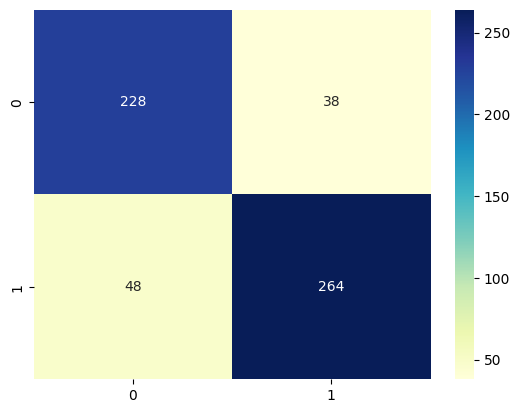

In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
print("Accuracy Score Testing :")
print(accuracy_score(y_test, predictions))
print("Classification Report : ")
print(classification_report(y_test,predictions))
cm = metrics.confusion_matrix(y_test, predictions)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
data
k_folds = KFold(n_splits = 10)
clf=RandomForestClassifier( random_state=42 )
scores = cross_val_score(clf, X_train, y_train, cv = k_folds)
print("Average CV Score: ", scores.mean())
# Average CV Score:  0.8548804818370035 /0.85

Average CV Score:  0.8548804818370035


# MultinomialNB model

Accuracy Score Testing : 0.842560553633218
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       266
           1       0.81      0.92      0.86       312

    accuracy                           0.84       578
   macro avg       0.85      0.84      0.84       578
weighted avg       0.85      0.84      0.84       578



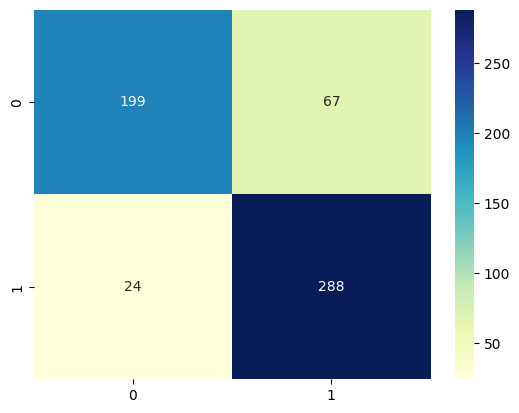

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy Score Testing :" ,accuracy_score(y_test, y_pred))
print("Classification Report : ")
print(classification_report(y_test,y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [36]:

from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 10)
clf=MultinomialNB()
scores = cross_val_score(clf, X_train, y_train, cv = k_folds)
print("Average CV Score: ", scores.mean())
# Average CV Score:  0.8388556371165066 /84

Average CV Score:  0.8388556371165066


Voting Classifier


Training Accuracy score: 0.9987001733102253
Testing Accuracy score: 0.8737024221453287
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       266
           1       0.87      0.89      0.88       312

    accuracy                           0.87       578
   macro avg       0.87      0.87      0.87       578
weighted avg       0.87      0.87      0.87       578



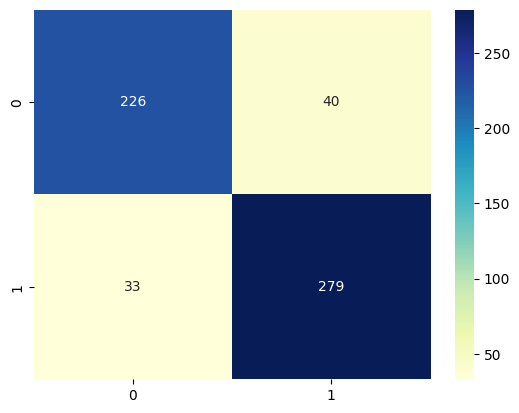

In [34]:
from sklearn.ensemble import VotingClassifier


ensemble = VotingClassifier(estimators=[('RF', model1), ('NB', model)], voting='soft')
ensemble.fit(X_train, y_train)
y_pred_train = ensemble.predict(X_train)
y_pred_test = ensemble.predict(X_test)


from sklearn.metrics import accuracy_score
import seaborn as sns
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm
                        )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 10)
clf = VotingClassifier(estimators=[('RF', model1), ('NB', model)], voting='soft')
scores = cross_val_score(clf, X_train, y_train, cv = k_folds)
print("Average CV Score: ", scores.mean())
# Average CV Score:  0.8635497835497835 /87

Average CV Score:  0.8635497835497835
